In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# better visuals
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Imports Loaded Successfully ✔")


Imports Loaded Successfully ✔


In [3]:
df = pd.read_csv("../data/crop_recommendation.csv")
print("Dataset Loaded ✔")

df.head()

Dataset Loaded ✔


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

df.info()

Shape: (2200, 8)

Columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [7]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


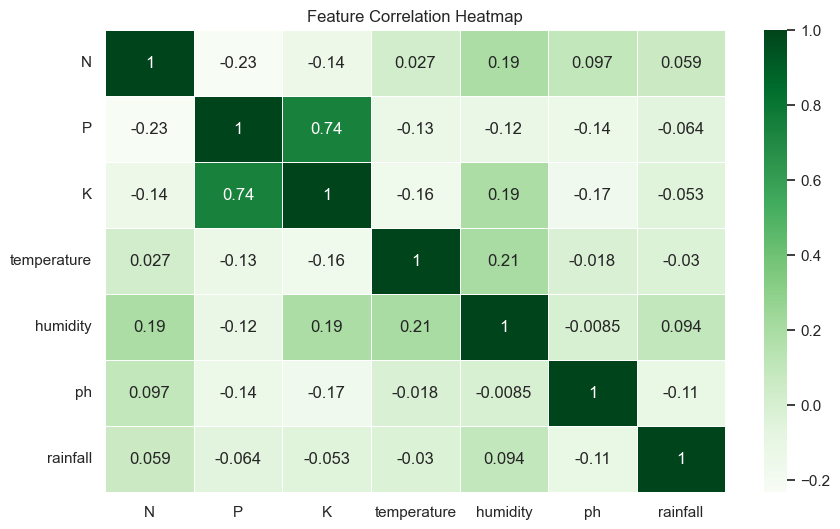

In [9]:
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="Greens", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


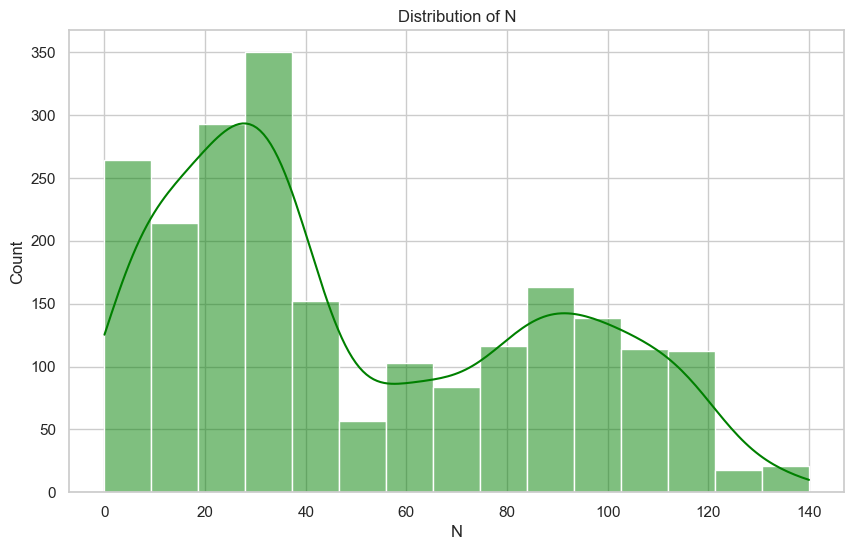

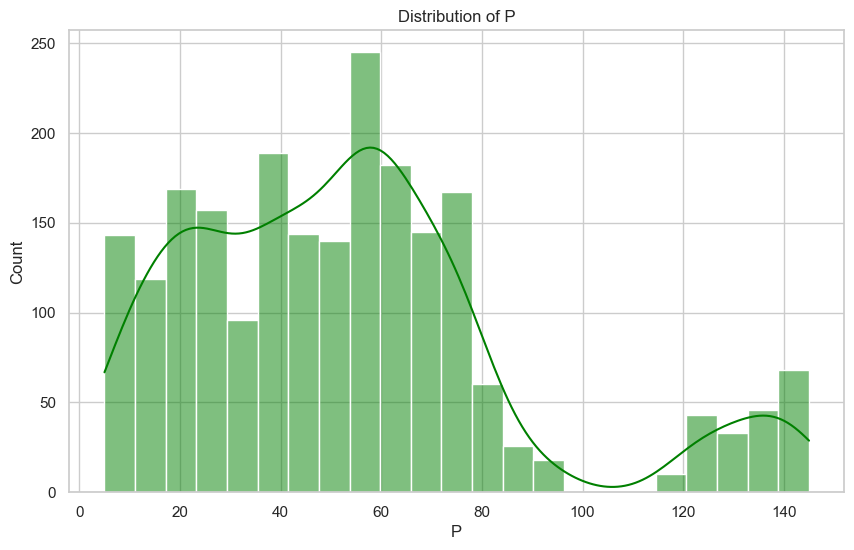

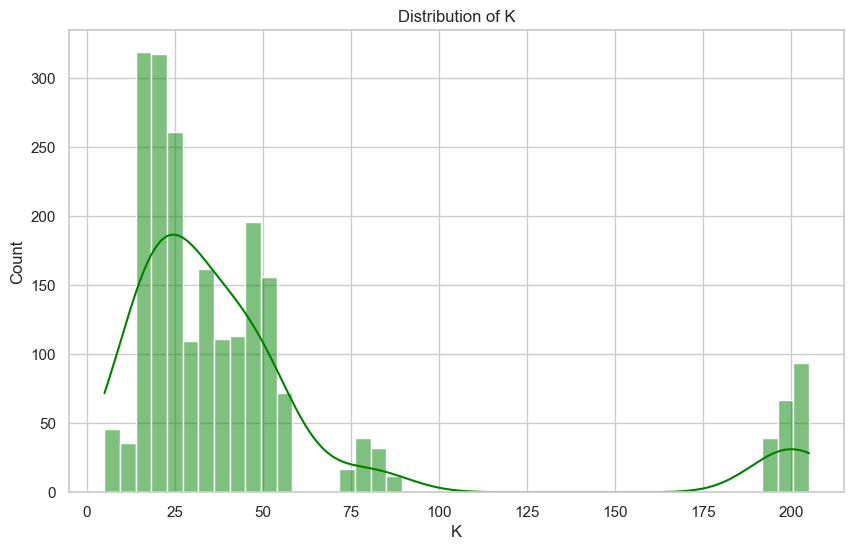

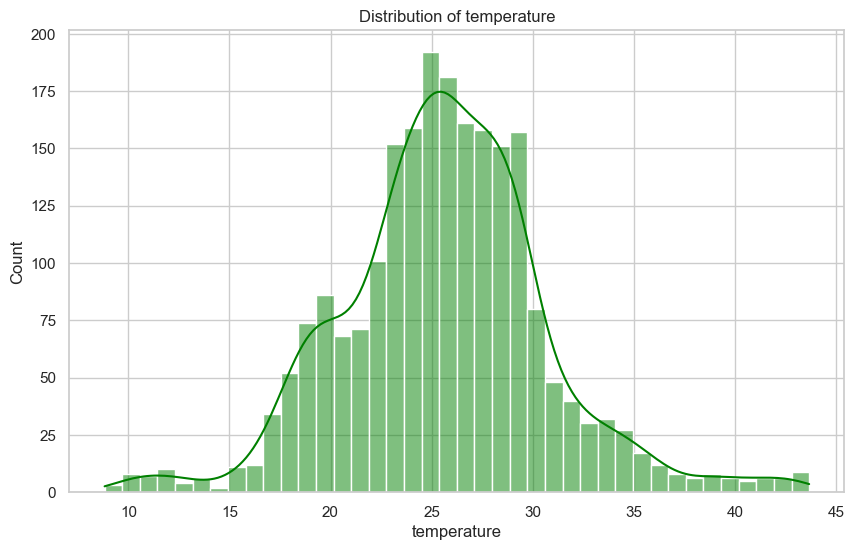

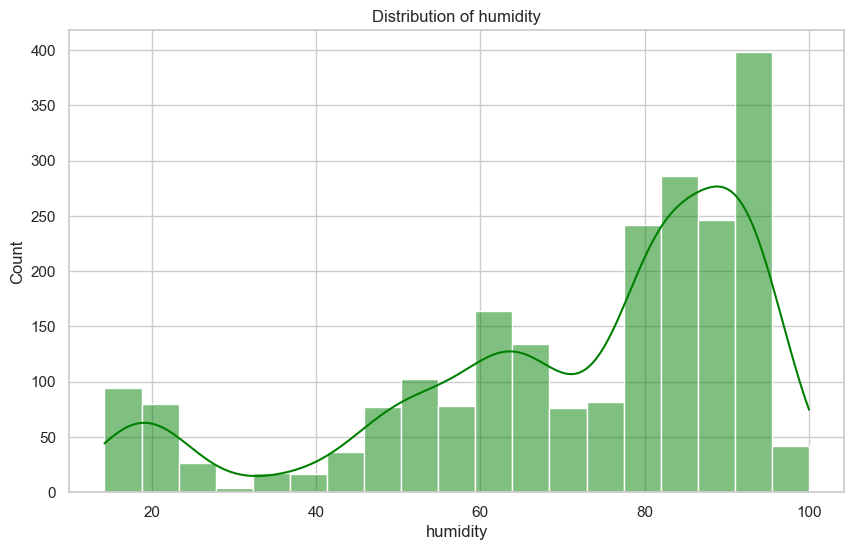

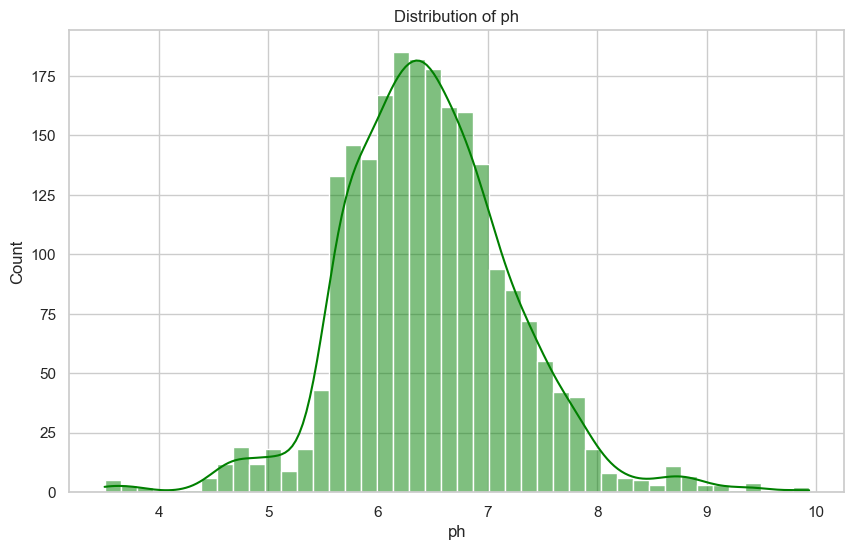

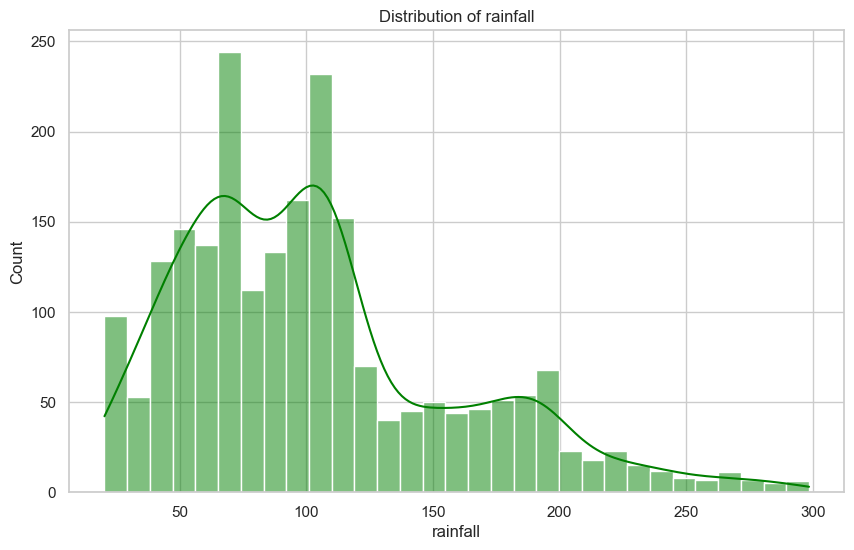

In [10]:
cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

for col in cols:
    plt.figure()
    sns.histplot(df[col], kde=True, color="green")
    plt.title(f"Distribution of {col}")
    plt.show()

C:\Users\vmohi\AppData\Local\Temp\ipykernel_21356\3247217295.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['label'], palette="viridis")


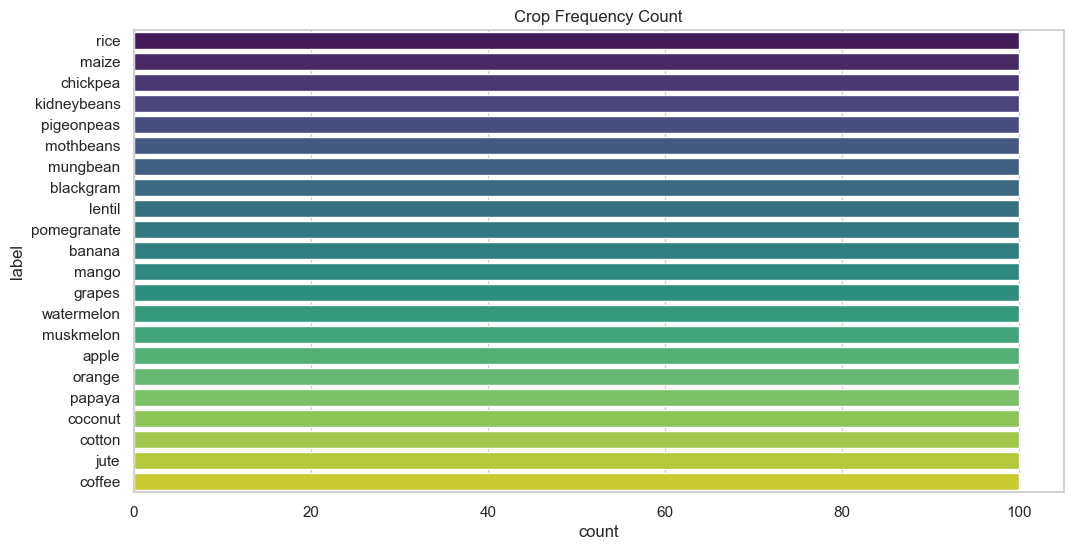

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df['label'], palette="viridis")
plt.title("Crop Frequency Count")
plt.show()

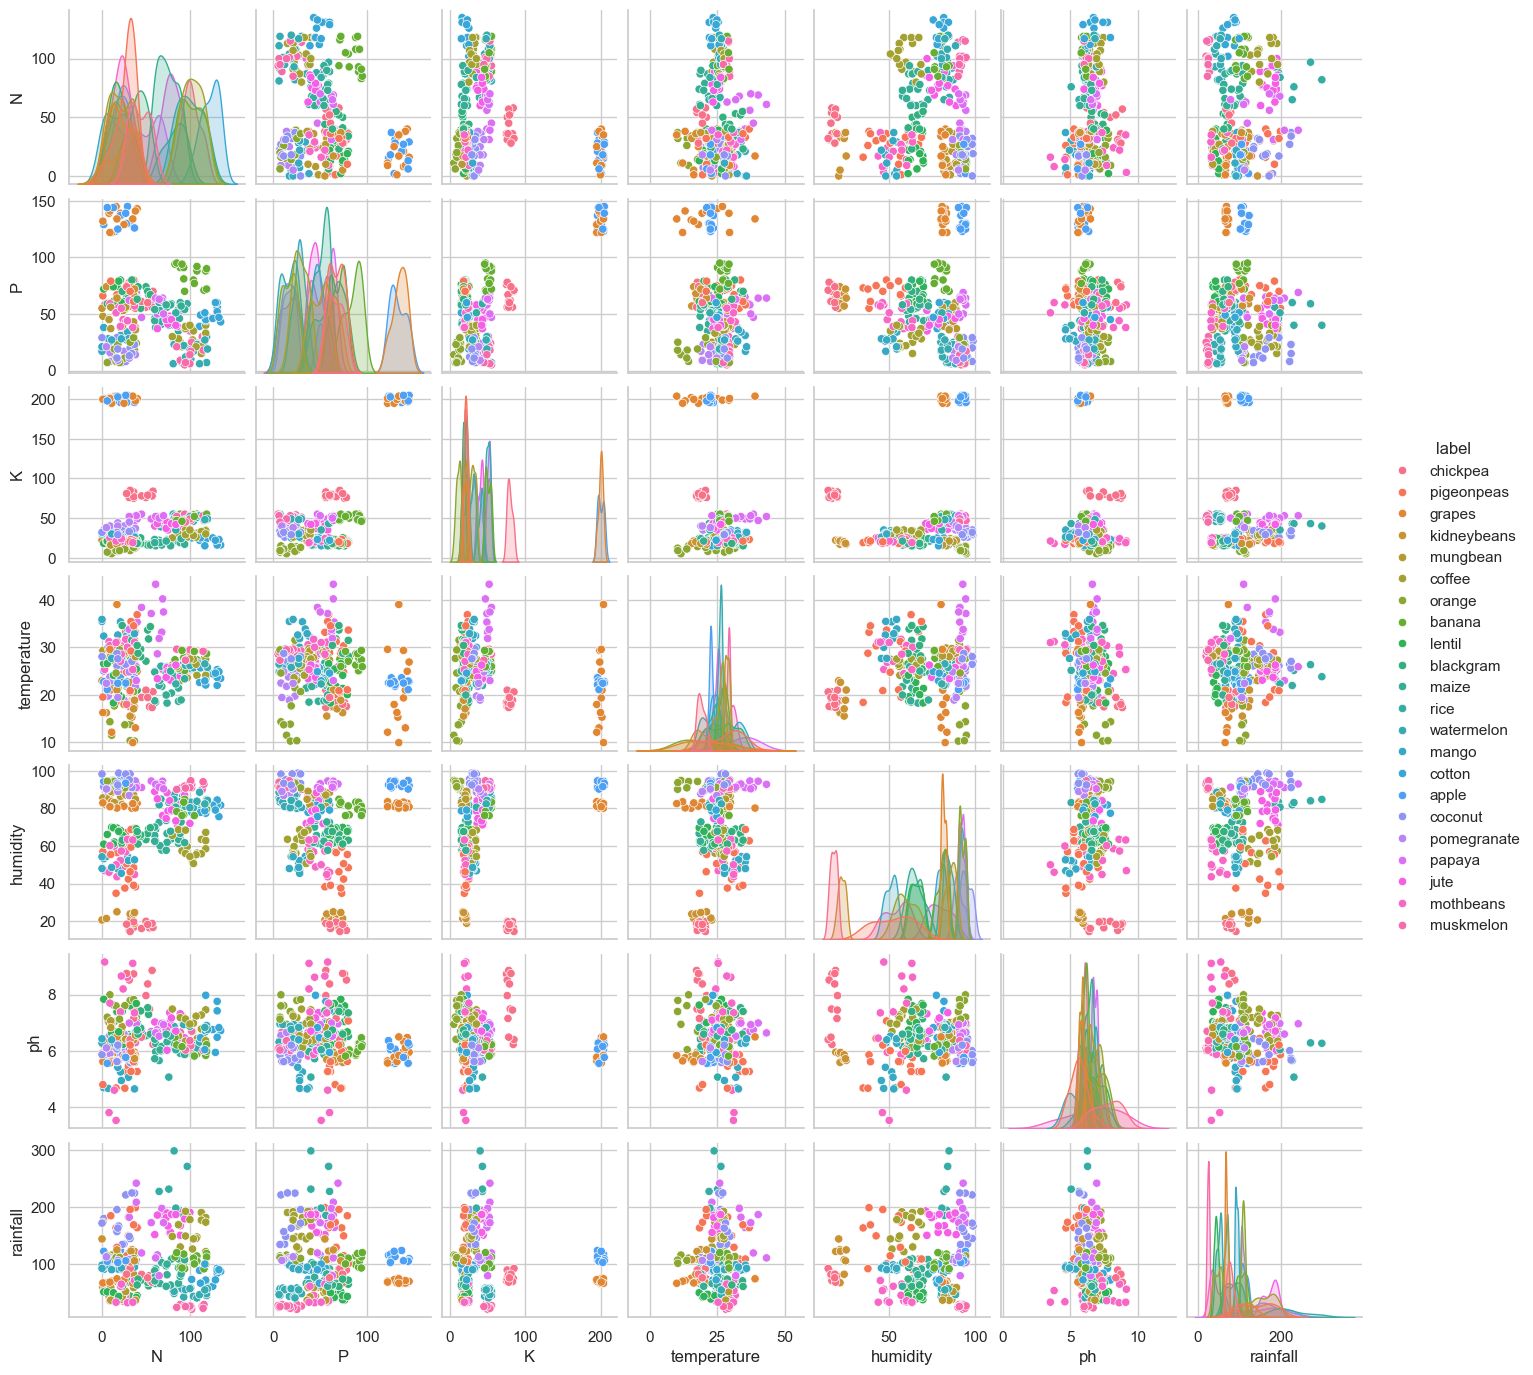

In [12]:
sns.pairplot(df.sample(300), hue="label", height=2)
plt.show()

In [14]:
summary_path = "../logs/eda_summary.txt"
with open(summary_path, "w") as f:
    f.write("Dataset Shape: " + str(df.shape) + "\n\n")
    f.write("Columns: " + str(df.columns.tolist()) + "\n\n")
    f.write("Missing Values:\n" + str(df.isnull().sum()) + "\n\n")
    f.write("Unique Labels:\n" + str(df['label'].unique()) + "\n\n")

summary_path

'../logs/eda_summary.txt'